# 目標

## 機械学習の基礎を理解して、独自で基本的な学習モデルのコードを実装できるようになる。

# 学習内容

## - AIとは何か
## - 機械学習の基本原理とは
## - 機械学習を構成する要素
## - 機械学習モデルとは
## - TensorFlowとPythonによるautoencoderの実装
## - 画像分類技術の基礎
## - TensorFlowとPythonによる画像分類の実装
## - スパムメール分類
## - 強化学習の基礎
## - 迷路探索アルゴリズムの実装(各自)
## - 生成AIの使い方（プロンプト）

## 単純パーセプトロン　

### 入門

#### パーセプトロンの定義：生物学的着想から人工ニューロンへ

パーセプトロンは、ニューラルネットワークの分野における最も基本的なアルゴリズムであり、その起源は生物の神経細胞（ニューロン）の信号処理メカニズムにあります 。ニューロンは、他のニューロンから信号を受け取り（樹状突起）、それを細胞体で処理し、信号の強さが特定の閾値を超えると次のニューロンへ信号を出力（軸索発火）します 。パーセプトロンは、この生物学的なプロセスを数学的に模倣したモデルです 。   

具体的には、「人工ニューロン」とも呼ばれる単純パーセプトロンは、複数の二値（0か1）の入力を受け取り、それらに基づいて単一の二値（0か1）の出力を生成する非常にシンプルな計算ユニットです 。これはあくまで生物学的ニューロンの機能を大幅に簡略化したモデルである点に注意が必要です 。   

#### 歴史的背景と意義（フランク・ローゼンブラット）

パーセプトロンは、1957年から1958年にかけて、アメリカの心理学者フランク・ローゼンブラットによって考案されました 。これはニューラルネットワーク研究の原点と見なされており 、後のディープラーニング技術の先駆けとなる重要な概念でした 。発表当初は大きな期待を集めましたが、後にマービン・ミンスキーとシーモア・パパートによってその限界（特にXOR問題のような線形分離不可能な問題を解けないこと）が指摘され、これが第一次AIブームの終焉、いわゆる「AIの冬」の一因となったとも言われています 。   

#### ニューラルネットワークの礎石としてのパーセプトロン

「単純パーセプトロン」とは、通常、単一の計算ユニットを指します。これは、より複雑なネットワーク構造を理解するための基本的な構成要素（ビルディングブロック）です 。単純パーセプトロンの仕組みを理解することは、多層パーセプトロン（MLP）やディープラーニングといった、より高度なモデルを学ぶ上で不可欠です 。   

なお、「パーセプトロン」という用語は、文脈によってこの単純なモデル（単層）を指す場合と、複数のパーセプトロンを組み合わせた多層構造を指す場合と、複数のパーセプトロンを組み合わせた多層構造を指す場合があります 。本レポートでは、主に「単純パーセプトロン」に焦点を当てて解説を進めます。   

### 構造

#### アーキテクチャ概要：入力層と出力層

単純パーセプトロンは、非常に基本的な二層構造を持っています。信号を受け取る「入力層」と、単一の結果を出力する「出力層」のみで構成されます 。多層パーセプトロン（MLP）との大きな違いは、入力層と出力層の間に「中間層（隠れ層）」が存在しない点です 。   

![Perceptron](./perceptron.png)

#### 主要な構成要素

単純パーセプトロンは、以下の要素から成り立っています。

- 入力 (Input, 特徴量, x): パーセプトロンに与えられるデータの特徴を表す信号です。通常、複数の入力 $(x_1,x_2, ..... , x_n)$を受け取ります 。   
- 重み (Weight, シナプス強度, w): 各入力信号 $x_i$ に関連付けられた数値であり、その入力が出力に与える影響の大きさ、すなわち重要度を示します 。どの入力がより重要かを制御するパラメータであり $(w_1, w_2, ..... , w_n)$ 、学習プロセスを通じてこれらの重みが調整されます 。   
- バイアス (Bias, b) / 閾値 (Threshold, θ):
   - 閾値 (θ): パーセプトロンが「発火」（出力を1とする）するために、入力の重み付き和が超えるべき境界値です 。ニューロンの発火のしやすさを制御します 。   
   - バイアス (b): 閾値と同様の役割を果たすパラメータで、数式上は b=−θ の関係にあります 。バイアスは、決定境界の位置を平行移動させる効果を持ち、活性化の閾値を調整します 。実装上は、常に+1の値を持つ追加の入力 $x_0$に対応する重み$w_0$として扱われることがよくあります 。   
- 活性化関数 (Activation Function, ステップ関数): 最終的な出力を決定する関数です。単純パーセプトロンでは、通常「ステップ関数」（ヘヴィサイド関数）が用いられます 。これは、入力の総和（重み付き和＋バイアス）がある基準値（バイアスを用いる場合は通常0）を超えた場合に1を、それ以外の場合に0（または-1 ）を出力します。   

$$  \begin{equation*}
    y = 
   \left\{
      \begin{align*}
         0 \quad ( w1 * x_1 + w_2 * x_2 \leq \theta ) \\
         1 \quad ( w1 * x_1 + w_2 * x_2 \gt \theta  ) 
      \end{align*}
   \right.
\end{equation*}
$$

### Python実装

```Python
def perceptron(x1, x2):
	w1 = 5		#任意の値を代入
	w2 = 5		#任意の値を代入
	theta = 8	#任意の値を代入
	sum = x1*w1+x2*w2
	if sum <= theta:
		return 0
	else:
		return 1
```

In [ ]:
%matplotlib inline

"""Train My Autoencoder Model"""

from __future__ import print_function
from numpy import random
import numpy as np
from matplotlib.lines import Line2D  

random.seed(42)  # @UndefinedVariable

from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications import ResNet50

"""Autoencoder Simples Model
https://elix-tech.github.io/ja/2016/07/17/autoencoder.html
参考論文 : https://arxiv.org/pdf/1812.11262.pdf
[我々はロバストな予測のためのオートエンコーダーベースの残差ディープネットワークを提案する]
"""
    
    # load mnist data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, [-1, x_train.shape[1] * x_train.shape[2]])
x_test  = np.reshape(x_test, [-1, x_test.shape[1] * x_test.shape[2]])

# encode
encoding_dim = 32
input_img    = Input(shape=(x_train.shape[1], ), name = "autoencoder" + "_input")
encoded      = Dense(encoding_dim, activation='relu')(input_img)
encoded      = Flatten(name='flatten_e1')(encoded)
encoded      = Dense(encoding_dim, activation='relu')(encoded)
encoded      = Flatten(name='flatten_e2')(encoded)
encoded      = Dense(encoding_dim, activation='relu')(encoded)
encoded      = Flatten(name='flatten_e3')(encoded)
encoded      = Dense(encoding_dim, activation='relu')(encoded)
# decode
decoded      = Dense(784, activation='sigmoid')(encoded)
decoded      = Flatten(name='flatten_d1')(decoded)
decoded      = Dense(784, activation='sigmoid')(decoded)
decoded      = Flatten(name='flatten_d2')(decoded)
decoded      = Dense(784, activation='sigmoid')(decoded)
decoded      = Flatten(name='flatten_d3')(decoded)
decoded      = Dense(784, activation='sigmoid')(decoded)
    
autoencoder  = Model(input_img, decoded)

# Opt
opt = Adam(lr=1e-4)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy') <- NG
autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
    
hist = autoencoder.fit(x_train, x_train, epochs=80, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)

def results_draw(x_test, decode_imgs) :
      
    """Draw Autoencoder Results
    """
    import matplotlib.pyplot as plt
      
    # 何個表示するか
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # オリジナルのテスト画像を表示
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # 変換された画像を表示
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    #plt.savefig("autoencoder_results.png")
    plt.show()

results_draw(x_test, decoded_imgs)


In [ ]:
import numpy as np

print(np.__version__)

In [ ]:
self.decorder = tf.keras.Sequential([layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'), 
                                     layers.Reshape(shape)], name = "decoder")

In [ ]:
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation 
import matplotlib.pyplot as plt
import numpy as np
 
# 絶対値の範囲が 有限なもの
activations_type0 = [
    "sigmoid",
    "tanh",
    "hard_sigmoid",
    "softsign",
]

# 絶対値の範囲に上限がないもの
activations_type1 = [
    "elu",
    "selu",
    "softplus",
    "relu",
    "linear",
]

x = np.linspace(-5, 5, 101).reshape(-1, 1)

fig = plt.figure(figsize=(10, 8))
for i, activations in enumerate([activations_type0, activations_type1]) :
    ax = fig.add_subplot(2, 1, i + 1)
    for activation_str in activations:
        model = Sequential()
        model.add(Activation(activation_str, input_shape=(1,)))
        y = model.predict(x).ravel()
        ax.plot(x, y, label=activation_str)
    ax.legend()

plt.show()

## 再急降下法

多くの場合、学習の問題は、与えられた評価関数を最適とするようなパラメータを求める問題として定式
化されます。従って、学習のためには、その最適化問題を解くための手法が必要になります。最適化手法に
は、簡単なものから高速性や安定性のために工夫した複雑手法まで、多くの手法がありますが、ここでは、
最も簡単な最適化手法のひとつである最急降下法と呼ばれる最適化手法の基本的な考え方について理解し
そのプログラムを作ってみることにします

### 問題
あるパラメータa の良さの評価尺度が以下のような２次の関数  

 $$ f(a) = (a - 1.0) ^ 2 $$

 で与えられたとします。このとき、この評価関数が最小となるパラメータ a の(最適解) を求めなさい。  

 $$ 微分 :     \frac{\partial f}{\partial a} = 2(a - 1.0) $$

### 再急降下法
最急降下法 最急降下法は、ある適当な初期値(初期パラメータ) からはじめて、その値を繰り返し更新する
(修正する) ことにより、最適なパラメータの値を求める方法(繰り返し最適化手法) の最も基本的で
単な方法です。

$$ 更新式 :  \alpha^{(k + 1)} = \alpha^{(k)} - 2\alpha(a - 1.0) $$

In [ ]:
%matplotlib inline
import sympy as sy
from IPython.display import display, Math

# SymPy Plotting Backends (SPB)
#from spb import plot, plot_implicit
from spb import plot

# グラフを SVG で Notebook にインライン表示
# これは試し
%config InlineBackend.figure_formats = ['svg']

# おまじない
sy.init_printing()

# π，ネイピア数，虚数単位
from sympy import pi, E, I


a = sy.symbols('a')

func = lambda x: (x -1.0) ** 2
display(Math(r" func = %s" % sy.latex(func(a))))

dfunc = sy.diff(func(a), a)
display(Math(r" \frac{d}{da} func = %s" % sy.latex(dfunc)))

print("value = {}".format(sy.solve(dfunc)))

plot(func(a), (a, -2, 4), line_color='r')

def main() :
    
    import numpy as np

    alpha = 0.1
    rng = np.random.default_rng()
    _a = 100 * (rng.random() - 0.5)
    
    for _ in range(100) :
        _a = _a - alpha * dfunc.subs(a, _a)
        
    return _a


print(" result = ", main())

In [ ]:
%matplotlib inline
"""autoencoderを実装する"""
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.datasets import fashion_mnist

# 学習データを用意する
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# データを正規化する
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.

print("x_train.shape = ", x_train.shape)
print("x_test.shape  = ", x_test.shape)

# 潜在空間の次元数
latent_dim   = 64
# targetの次元数
target_shape = x_train.shape[1:]

# batch size, epoch
batch_size = 128
epochs     = 10

# modelの定義
model = Sequential(name = "autoencoder")
encoder_1 = Flatten(input_shape = target_shape, name = "encoder_1")
encoder_2 = Dense(latent_dim, activation = 'relu', name = "encoder_2")
model.add(encoder_1)
model.add(encoder_2)
#decorder_1 = Dense(tf.math.reduce_prod(target_shape), activation = 'sigmoid', name = "decoder_1")
decorder_1 = Dense(target_shape[0] * target_shape[1], activation = 'sigmoid', name = "decoder_1")
decorder_2 = Reshape(target_shape, name = "decoder_2")
model.add(decorder_1)
model.add(decorder_2)

# compile
model.compile(optimizer = optimizers.Adam(), loss = losses.MeanSquaredError())

model.summary()

# 学習
history = model.fit(x_train, x_train, 
                    epochs  = epochs, batch_size = batch_size, 
                    shuffle = True,  validation_data = (x_test, x_test))

# 結果を評価する
decoded_imgs = model.predict(x_test)
print("decoded_imgs.shape = ", decoded_imgs.shape)

def results_draw(x_test, decode_imgs) :
      
    """Draw Autoencoder Results
    """
    import matplotlib.pyplot as plt
      
    # 何個表示するか
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # オリジナルのテスト画像を表示
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # 変換された画像を表示
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

results_draw(x_test, decoded_imgs)

x_train.shape =  (60000, 28, 28, 1)
x_test.shape  =  (10000, 28, 28, 1)
target_shape =  (28, 28, 1)
Model: "cnn_autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_2 (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 encoder_3 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 decoder_1 (Conv2DTranspose  (None, 14, 14, 64)        36928     
 )                                                               
                                                                 
 decoder_2 (Conv2DTranspose  (None, 28, 28, 32)        18464     
 )                                                               
                                                                 
 decoder_3 (Conv2D)          (None, 28, 28, 1)         289       
                 

2025-04-25 16:16:56.976674: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


469/469 [==============================] - 10s 19ms/step - loss: 0.2920 - val_loss: 0.2597
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2538 - val_loss: 0.2528
Epoch 3/10
469/469 [==============================] - 9s 18ms/step - loss: 0.2496 - val_loss: 0.2504
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2477 - val_loss: 0.2487
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2464 - val_loss: 0.2478
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2455 - val_loss: 0.2469
Epoch 7/10
469/469 [==============================] - 9s 18ms/step - loss: 0.2448 - val_loss: 0.2467
Epoch 8/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2444 - val_loss: 0.2459
Epoch 9/10
469/469 [==============================] - 9s 18ms/step - loss: 0.2439 - val_loss: 0.2459
Epoch 10/10
313/313 [==============================] - 2s 5ms/step
decoded_imgs.shape =  (10000, 28, 

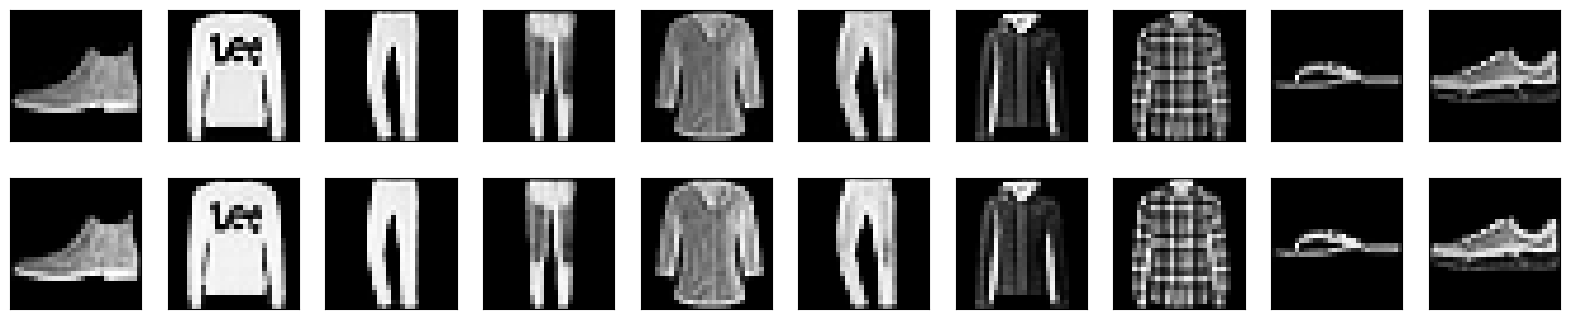

In [2]:
%matplotlib inline
"""CNN autoencoderを実装する"""
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.datasets import fashion_mnist

# 学習データを用意する
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# データを正規化する
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test, (len(x_test), 28, 28, 1))

print("x_train.shape = ", x_train.shape)
print("x_test.shape  = ", x_test.shape)

# targetの次元数
target_shape = x_train.shape[1:]
print("target_shape = ", target_shape)

# batch size, epoch
batch_size = 128
epochs     = 10

# modelの定義
model = Sequential(name = "cnn_autoencoder")
encoder_1 = Input(shape = target_shape, name = "encoder_1")
encoder_2 = Conv2D(32, kernel_size = (3, 3), activation = 'relu', padding = 'same', strides = 2, name = "encoder_2")
encoded_3 = Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same', strides = 2, name = "encoder_3")
model.add(encoder_1)
model.add(encoder_2)
model.add(encoded_3)
decorder_1 = Conv2DTranspose(64, kernel_size = (3, 3), activation = 'relu', padding = 'same', strides = 2, name = "decoder_1")
decorder_2 = Conv2DTranspose(32, kernel_size = (3, 3), activation = 'relu', padding = 'same', strides = 2, name = "decoder_2")
decorder_3 = Conv2D(1, kernel_size = (3, 3), activation = 'sigmoid', padding = 'same', name = "decoder_3")
model.add(decorder_1)
model.add(decorder_2)
model.add(decorder_3)

# compile
model.compile(optimizer = optimizers.Adam(), loss = losses.BinaryCrossentropy())

model.summary()

# 学習
history = model.fit(x_train, x_train, 
                    epochs  = epochs, batch_size = batch_size, 
                    shuffle = True,  validation_data = (x_test, x_test))

# 結果を評価する
decoded_imgs = model.predict(x_test)
print("decoded_imgs.shape = ", decoded_imgs.shape)

def results_draw(x_test, decode_imgs) :
      
    """Draw Autoencoder Results
    """
    import matplotlib.pyplot as plt
      
    # 何個表示するか
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # オリジナルのテスト画像を表示
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # 変換された画像を表示
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

results_draw(x_test, decoded_imgs)